In [1]:
#  importar
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [ ]:
#  1. CARGA DE DATOS
df = pd.read_csv("Housing.csv")
print(df.head())

In [3]:
# 2. PREPROCESAMIENTO (Limpieza rápida)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, "no": 0}))
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, status], axis=1)
df.drop(['furnishingstatus'], axis=1, inplace=True)

In [4]:
# 3. VARIABLES SELECCIONADAS (Las 10 que ya sabemos que funcionan)
cols_modelo = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
               'guestroom', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X = df[cols_modelo]
y = df[['price']]

In [5]:
# 4. DIVISIÓN Y ESCALADO
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

In [6]:
# 5. COMPARACIÓN DE MODELOS  6. uardar Modelo y escaladores
modelos = {
    "Regresion Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=100)
}

print("--- EVALUACIÓN DE MODELOS (R2 Score) ---")
mejor_score = -1
mejor_modelo = None

for nombre, mod in modelos.items():
    # Entrenar (usamos .ravel() para que la 'y' sea un vector plano)
    mod.fit(X_train_scaled, y_train_scaled.ravel())
    
    # Predecir y evaluar
    preds = mod.predict(X_test_scaled)
    score = r2_score(y_test_scaled, preds)
    
    print(f"{nombre}: {score:.4f}")
    
    if score > mejor_score:
        mejor_score = score
        mejor_modelo = mod
        mejor_nombre = nombre

print(f"\n>>> El ganador es: {mejor_nombre} con un R2 de {mejor_score:.4f}")

--- EVALUACIÓN DE MODELOS (R2 Score) ---
Regresion Lineal: 0.6520
Random Forest: 0.5594
Gradient Boosting: 0.5727

>>> El ganador es: Regresion Lineal con un R2 de 0.6520


In [7]:
# 6. GUARDAR EL GANADOR Y LOS ESCALADORES
joblib.dump(mejor_modelo, 'modelo_housing.pkl')
joblib.dump(sc_X, 'escalador_X.pkl')
joblib.dump(sc_y, 'escalador_y.pkl')
joblib.dump(cols_modelo, 'columnas_seleccionadas.pkl')
print("\n¡Archivos del modelo ganador guardados exitosamente!")


¡Archivos del modelo ganador guardados exitosamente!


C:\Users\ACER\AppData\Local\Temp\ipykernel_19624\3249419484.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='magma')


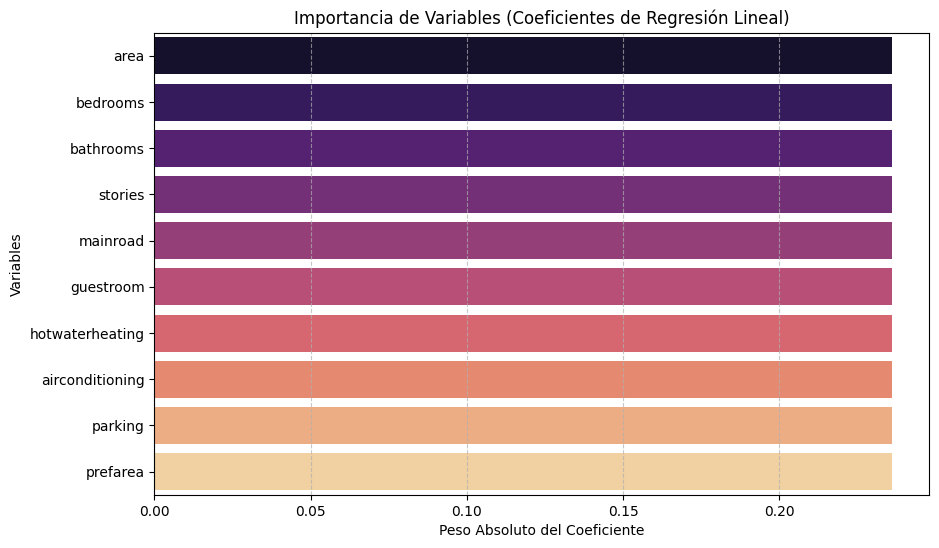

In [9]:
# 7. Obtener Coeficientes (en R Lineal o sea importancia)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Obtener los coeficientes (en Regresión Lineal esto es la 'importancia')
# Usamos el valor absoluto porque un coeficiente muy negativo también es muy importante
importancias = np.abs(mejor_modelo.coef_[0]) 
nombres_columnas = cols_modelo
# 8. Crear el DataFrame y Graficar
feature_importance_df = pd.DataFrame({
    'Variable': nombres_columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# 3. Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='magma')

plt.title('Importancia de Variables (Coeficientes de Regresión Lineal)')
plt.xlabel('Peso Absoluto del Coeficiente')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
